<a href="https://colab.research.google.com/github/DivySuhagiya/MachineLearning/blob/main/Animal_Classification/AnimalClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from zipfile import ZipFile

In [2]:
dataset = '/content/animal_classification.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

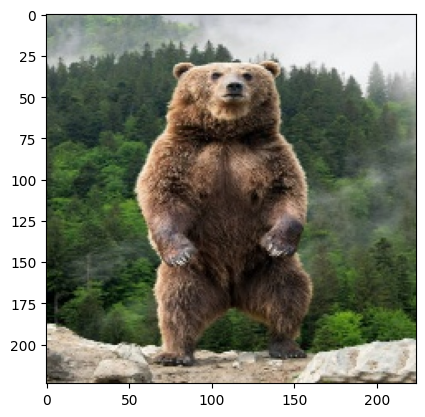

In [28]:
img = mpimg.imread('/content/Animal Classification/dataset/Bear/Bear_10.jpg')
imgplot = plt.imshow(img)
plt.show()

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/Animal Classification/dataset"
train_ratio = 0.8

datagen = ImageDataGenerator(validation_split=1 - train_ratio,
                             rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

# Training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1564 images belonging to 15 classes.
Found 380 images belonging to 15 classes.


In [30]:
print(train_generator.class_indices)

{'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}


In [31]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [49]:
num_classes = 15
image_size=(224,224)

In [48]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

In [58]:
x= base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x= Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [59]:
model = Model(inputs=base_model.input, outputs=predictions)

In [60]:
for layers in base_model.layers:
  layers.trainable = False

In [61]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=val_generator)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 747ms/step - accuracy: 0.5977 - loss: 1.7524 - val_accuracy: 0.8947 - val_loss: 0.2906
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 63s 486ms/step - accuracy: 0.9192 - loss: 0.2564 - val_accuracy: 0.9026 - val_loss: 0.3167
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 0.9582 - loss: 0.1582 - val_accuracy: 0.9158 - val_loss: 0.3091
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 486ms/step - accuracy: 0.9618 - loss: 0.1173 - val_accuracy: 0.9184 - val_loss: 0.2571
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 483ms/step - accuracy: 0.9691 - loss: 0.0926 - val_accuracy: 0.8711 - val_loss: 0.5580


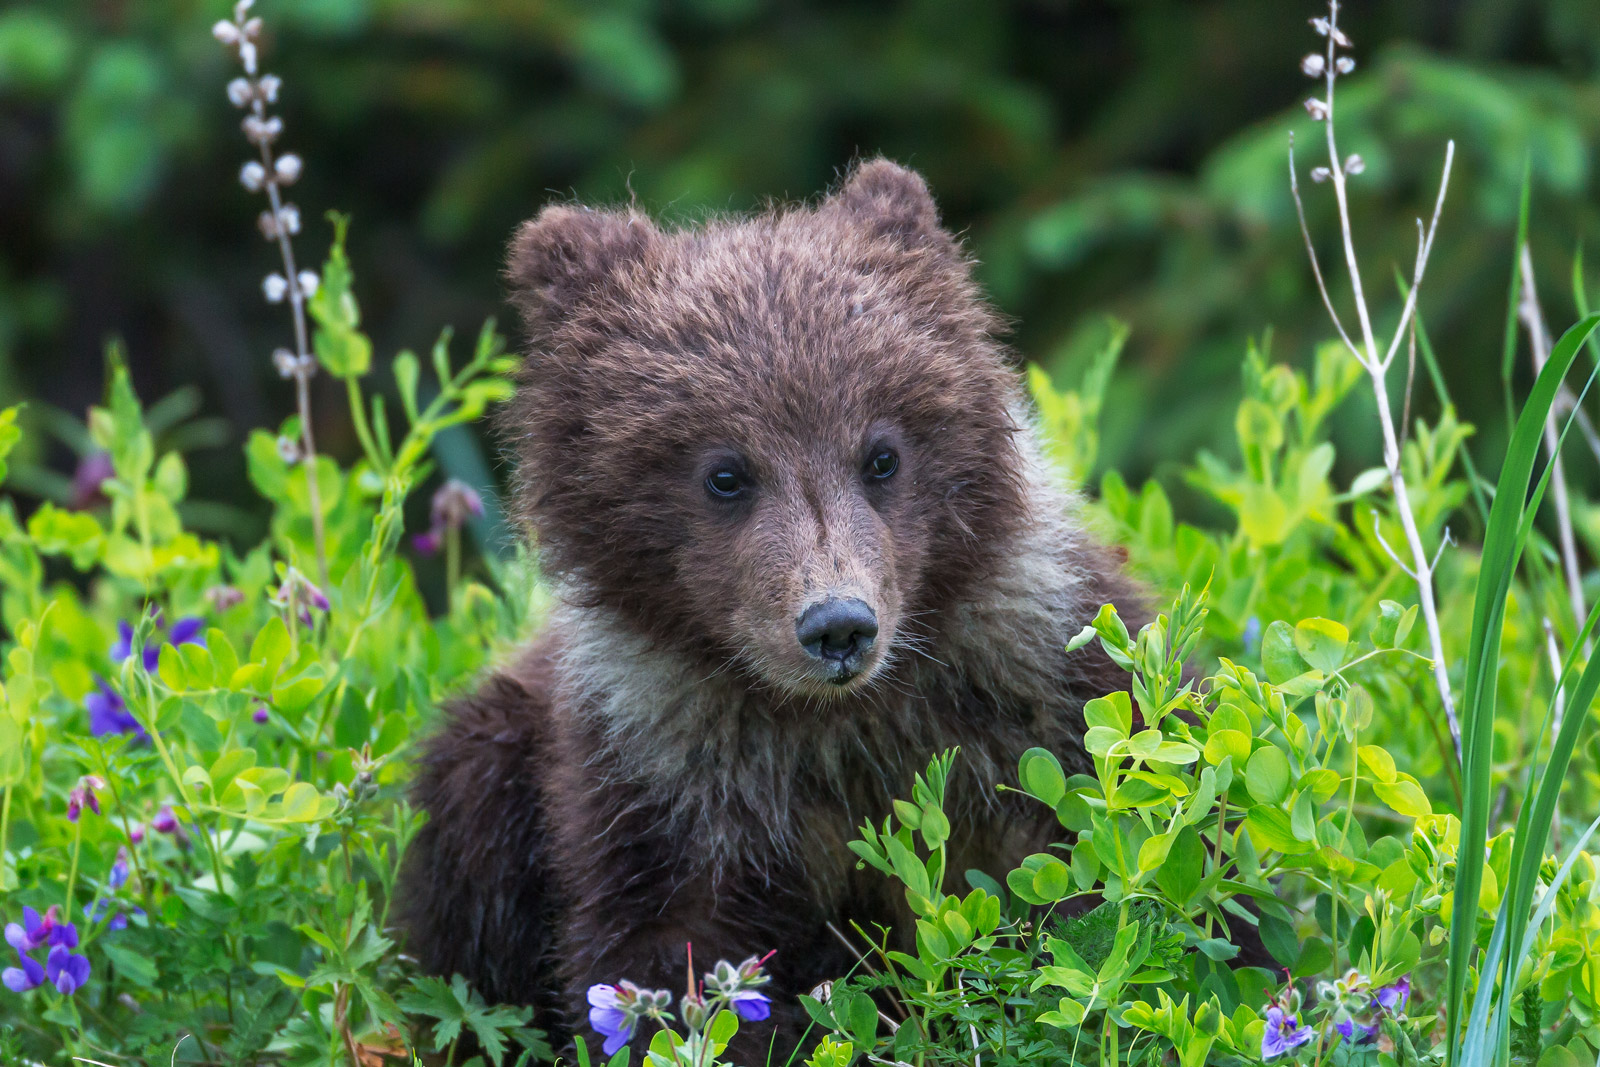

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[9.9999869e-01 1.9217281e-09 2.0663142e-10 2.9402578e-08 3.5182376e-07
  2.7698110e-10 3.0521394e-07 1.8952003e-08 1.5415916e-09 1.3961643e-07
  5.9732314e-10 2.3587465e-07 2.5482296e-07 2.9774980e-09 1.3023141e-09]]
Bear


In [68]:
import cv2

class_labels = {
    0: "Bear", 1: "Bird", 2: "Cat", 3: "Cow", 4: "Deer", 5: "Dog",
    6: "Dolphin", 7: "Elephant", 8: "Giraffe", 9: "Horse", 10: "Kangaroo",
    11: "Lion", 12: "Panda", 13: "Tiger", 14: "Zebra"
}

input_img_path = "/content/images/Brown-Grizzly-Bear-Cub-Alaska-1241-Edit.jpg"
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)
input_img_resize = cv2.resize(input_img, (224, 224))
input_image_scaled = input_img_resize / 255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(class_labels[input_pred_label])

In [ ]:
model.save("InceptionV3_Train.h5")